# Manaswi Vichare
## Data Science and Business Analysis - Prediction using Decision Tree Algorithm
## #GRIPJUNE21

### Importing Datasets:

In [126]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Loading and Reading The Dataset:

In [127]:
#Reading the Iris Dataset
iris = pd.read_csv("Iris.csv", index_col=0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [128]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [129]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing the Dataset

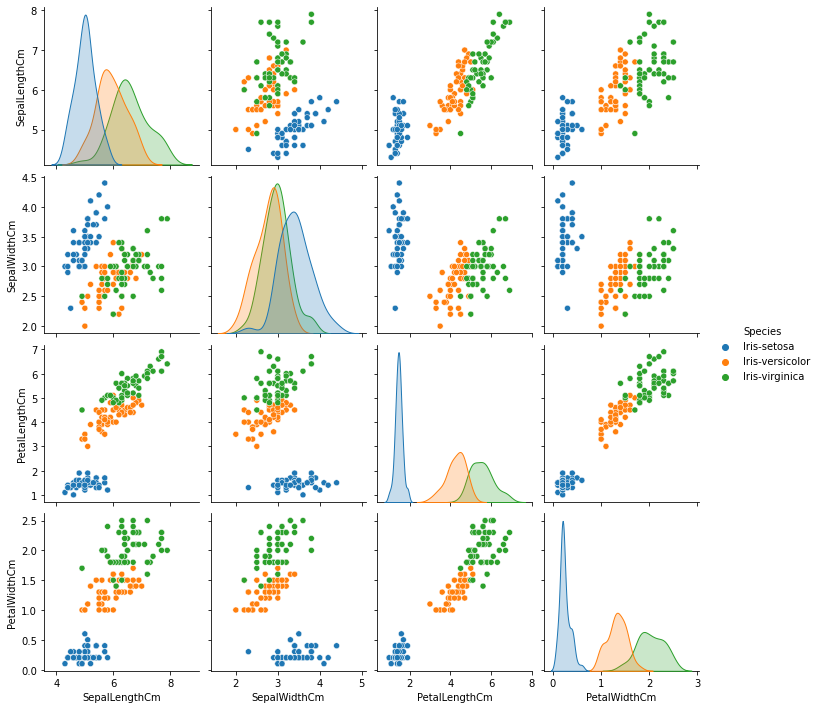

In [130]:
sns.pairplot(iris, hue="Species")

### Data Preprocessing:

In [131]:
target = iris['Species']
df = iris.copy()
df = iris.drop('Species', axis=1)
df.shape

(150, 4)

In [132]:
#Using LabelEncoder to convert the Categorical data to Numerical values
X = iris.iloc[:, [0,1,2,3]].values
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
y = iris['Species'].values
iris.shape

(150, 5)

In [133]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Correlation Matrix:

In [134]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


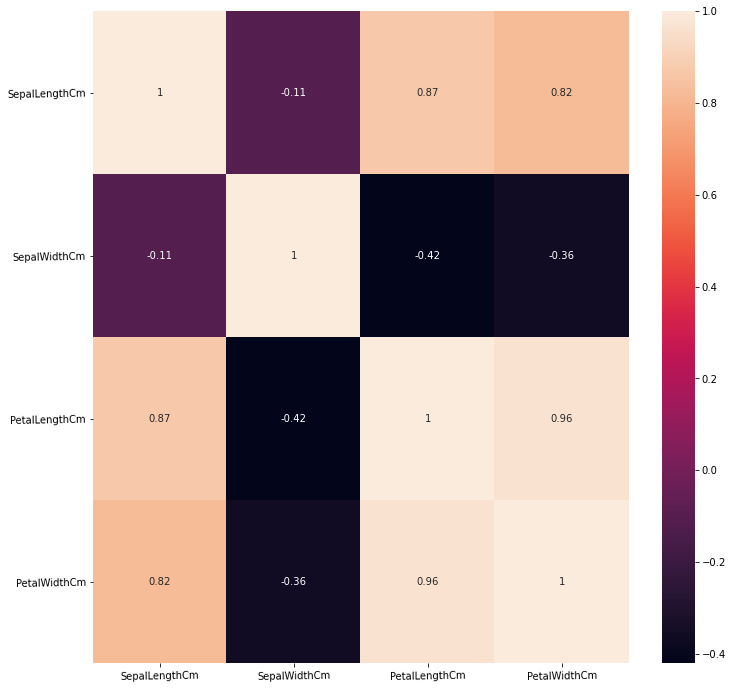

In [135]:
#Finding the Correlation Matrix
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=1)
plt.yticks(rotation=1);

### Splitting Data into Training and Testing Set

In [136]:
#Splitting into Train and Test Sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
X_train.shape

(120, 4)

In [138]:
X_test.shape

(30, 4)

In [139]:
y_train.shape

(120,)

In [140]:
y_test.shape

(30,)

### Using Decision Tree Algorithm

In [141]:
algo = DecisionTreeClassifier()
algo.fit(X_train, y_train)

DecisionTreeClassifier()

In [142]:
print("Training Accuracy:", algo.score(X_train,y_train))
print("Testing Accuracy:", algo.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


### Prediction

In [143]:
y_pred = algo.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [144]:
y_test[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [145]:
compare = pd.DataFrame(list(zip(y_pred, y_test)), columns =['Predicted', 'Actual'])
compare[:10]

,Predicted,Actual
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


### Confusion Matrix and Classification Report

In [146]:
confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [147]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree Visualization 

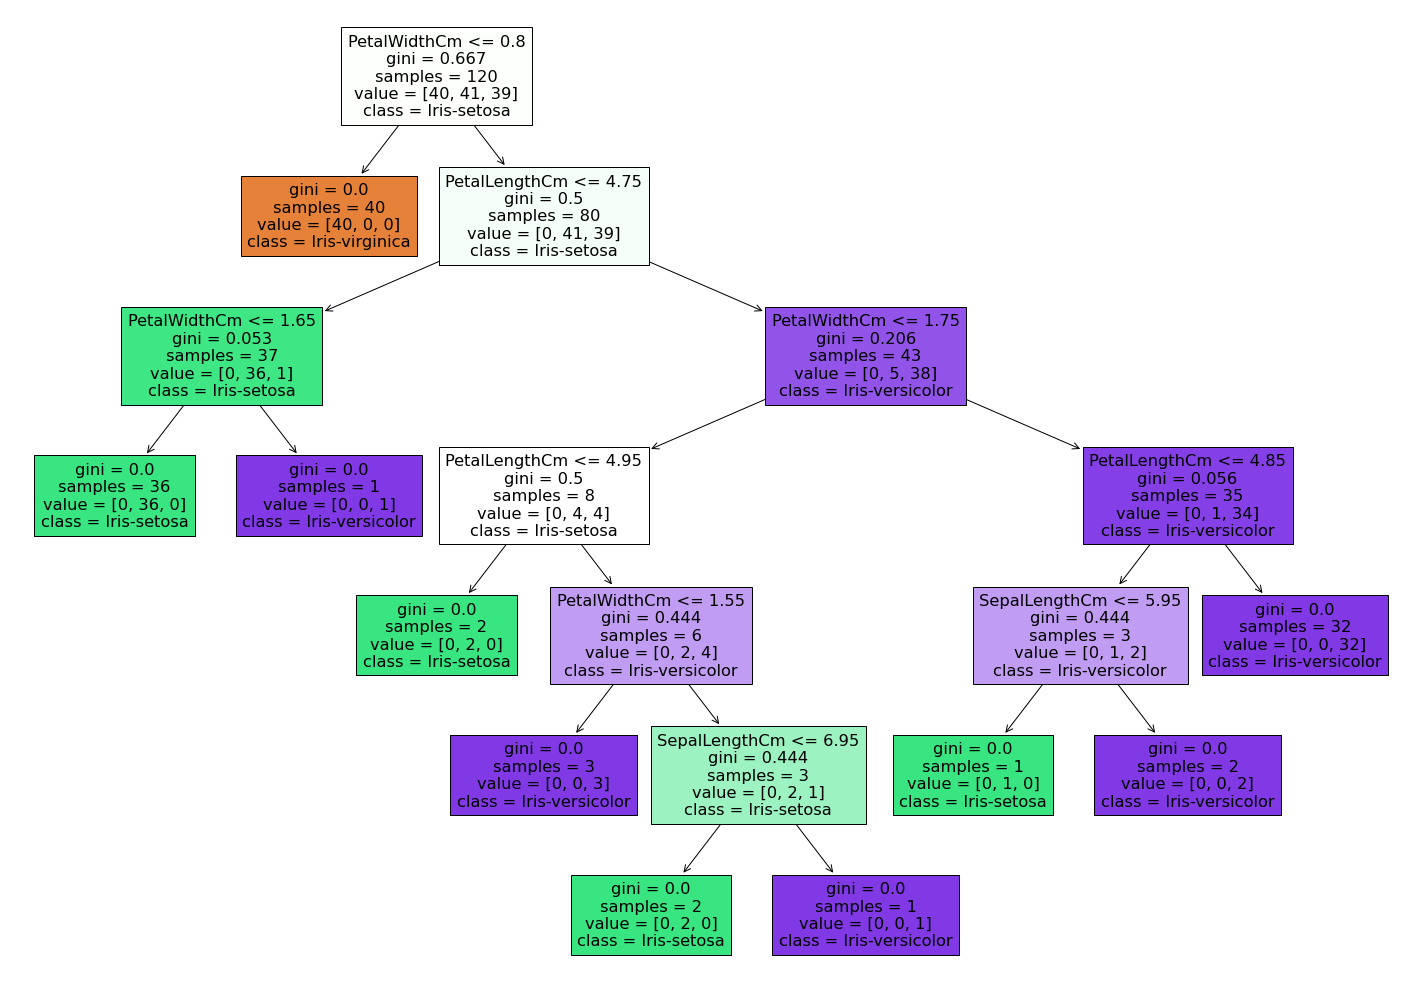

In [148]:
plt.figure(figsize=(25,18))
tree.plot_tree(algo, feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], 
               class_names=["Iris-virginica","Iris-setosa","Iris-versicolor"], filled=True);

## Thank You!